# Desafio Conceitual (Extra - Construir Histograma usando BarPlot


## Case baseado no desafio do Kaggle: "Instacart Market Basket Analysis"

Esse desafio é baseado em uma competição do Kaggle ([https://www.kaggle.com](https://www.kaggle.com)) de 2017, onde é pedido para fazer a predição de se um produto será comprado por dado usuário no carrinho atual, baseado em suas compras anteriores.

Link para o desafio: [https://www.kaggle.com/c/instacart-market-basket-analysis](https://www.kaggle.com/c/instacart-market-basket-analysis)

## Origem dos Dados:

Os dados mostrados nesse desafio são uma amostra extraída do dataset disponibilizado gratuitamente pela empresa Instacart ([https://www.instacart.com/](https://www.instacart.com/)) **\***. São dados reais do banco de dados da empresa, que foram anonimizados para o uso por pesquisadores e em competições de Data Science.

 
###### * “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from [https://www.instacart.com/datasets/grocery-shopping-2017](https://www.instacart.com/datasets/grocery-shopping-2017) on March 10, 2017.

___

# Imports

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
""" habilitando plots no notebook """
%matplotlib inline

In [3]:
""" plot libs """
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
""" Configurando o Matplotlib para o modo manual """
plt.interactive(False)

# Objetivo :

Analisar o dataset (o mesmo construído na Aula 07) e responder às questões em cada item usando gráficos.

# Importante:

Todos os gráficos devem conter:
* Título
* Rótulos do Eixo X e do Eixo Y

Se mais de um gráfico for plotado em uma única janela, eles devem ter:
* Cores diferentes
* Legenda
* Transparência (na sobreposição)

# Dataset:

O dataset utilizado nesse desafio é um sub-conjunto daquele construído na Aula 7. Para essa aula, será necessário carregar apenas duas colunas: `user_id` e `product_name`.

## Carregando os dados

In [5]:
""" Nota sobre o Warning: 
    O código abaixo levanta um Warning gerado por uma chamada interna do pandas conflitando com o Numpy.
    Não há necessidade de tratar esse Warning no momento, o comportamento do 'read_csv' é funcional para o que queremos.
"""
dataset = pd.read_csv(
    os.path.join("data", "dataset.csv"),
    usecols=["user_id", "product_name"],
    sep=",",
    index_col=0,
    encoding="utf-8"
)

C:\Users\allan\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Extração dos dados específicos

In [6]:
product_count = dataset.groupby("user_id").product_name.count()

In [7]:
product_count.describe()

count    114885.000000
mean         10.568394
std           7.946615
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          80.000000
Name: product_name, dtype: float64

In [8]:
product_count.head(10)

user_id
1     11
2     31
5      9
7      9
8     18
9     22
10     4
13     5
14    11
17     6
Name: product_name, dtype: int64

# Deafio Extra: Construindo um Histograma

O `histograma` é uma ferramenta bem poderosa, que mostra a distribuição dos dados usando uma contagem simples de `buckets`. Essa função já é dada pelas principais bibliotecas, mas o desafio agora é criar esse plot a partir das funções básicas do `matplotlib`.

## Agrupando os dados em `Buckets`

A primeira parte é a criação dos `buckets`. Isso é feito definindo quanto `buckets` serão utilizados e distribuindo os dados entre eles.

In [9]:
""" Definição dos Buckets """
bins = 10  # definição da quantidade de buckets

limits = np.linspace(product_count.min(), product_count.max(), bins+1)
limits

array([  1. ,   8.9,  16.8,  24.7,  32.6,  40.5,  48.4,  56.3,  64.2,
        72.1,  80. ])

In [10]:
""" Agrupamento dos dados """
histogram = {}

for p, q in zip(limits[:-1], limits[1:]):
    label = (p + q) / 2
    histogram[label] = ((product_count >= p) & (product_count < q)).sum()

histogram = pd.Series(histogram)
histogram

4.95     56483
12.85    36576
20.75    14600
28.65     5019
36.55     1554
44.45      464
52.35      136
60.25       35
68.15       12
76.05        5
dtype: int64

## Construindo o Gráfico de Barras (`Bar Plot`)

O gráfico de barras não foi dado na Pré-Aula, mas é uma das ferramentas básicas para a construção de gráficos importantes para um cientista de dados. 

Use uma das duas referências abaixo para construir o `histograma` da distribuição de quantidade de produtos por usuário:

1. [Pandas (nível fácil)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)
2. [Matplotlib Puro (nível hard)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)

Ambos os gráficos devem ter:
- Tamanho da Figura = 12 x 8
- Título
- Rótulos nos eixos X e Y
- As barras devem ter largura cheia, i.e. devem tocar as barras vizinhas.
- Todas as Barras devem ter a mesma cor

##### Pandas Style

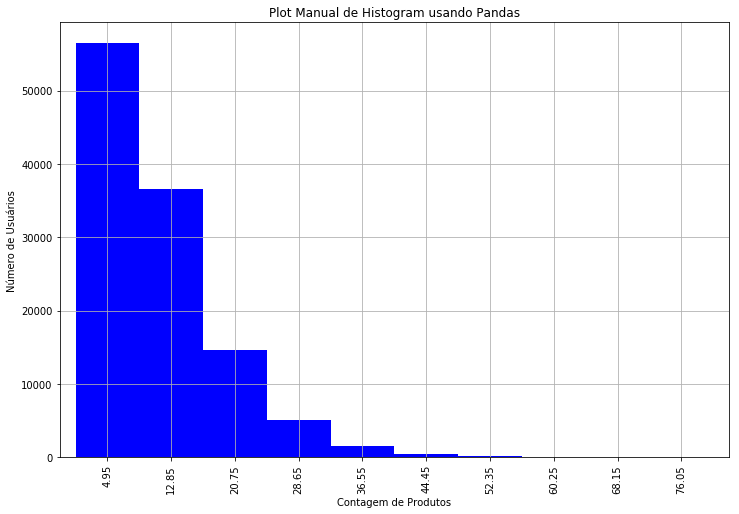

In [11]:
histogram.plot(kind="bar", color="blue", figsize=(12,8), width=1, grid=True)
plt.title("Plot Manual de Histogram usando Pandas")
plt.xlabel("Contagem de Produtos")
plt.ylabel("Número de Usuários")
plt.show()

##### Matplotlib Puro

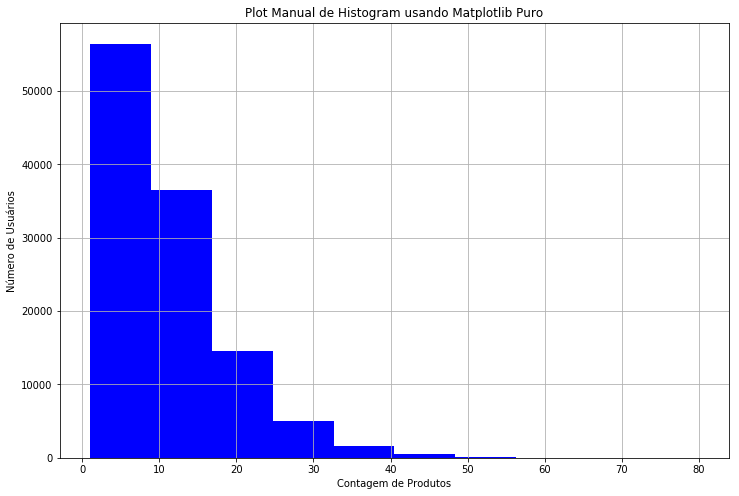

In [12]:
plt.figure(figsize=(12,8))
plt.bar(histogram.index, histogram.values, color="blue", width=7.9)
plt.title("Plot Manual de Histogram usando Matplotlib Puro")
plt.grid(True)
plt.xlabel("Contagem de Produtos")
plt.ylabel("Número de Usuários")
plt.show()

## Comparando diferentes números de Buckets

Usando o método `hist` do `pandas`, plotar o histograma com `bins=20` **por cima da mesma figura construída anteriormente**. 

O gráfico composto deve ter as seguintes características:
- O gráfico original (`bins=10`) deve ser plotado primeiro, em **azul**;
- O gráfico gerado pelo médoto `hist` deve ser plotado por cima do original, em **vermelho**;
- Ambos os gráficos devem estar visíveis (usar **transparência**);
- Deve haver uma legenda identificando os dois gráficos.


##### Nota: 

Na solução desse desafio, notou-se um problema ao usar o `barplot` do `pandas` associado com qualquer método de histograma. Esse problema é na interpretação dos valores do domínio (`x`), fazendo com que os gráficos não fiquem alinhados.

Para que a solução dê certo, é necessário que se use **apenas para o bar plot** a solução de `matplotlib` puro.

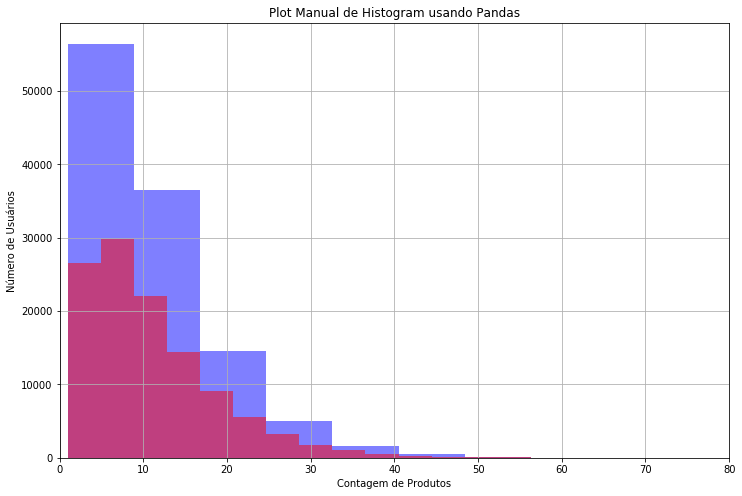

In [13]:
fig = plt.figure(figsize=(12,8))
plt.bar(histogram.index, histogram.values, color="blue", width=7.9, alpha=0.5)
product_count.hist(bins=20, color="red", alpha=0.5, ax=plt.gca())
plt.title("Plot Manual de Histogram usando Pandas")
plt.xlabel("Contagem de Produtos")
plt.ylabel("Número de Usuários")
plt.xlim(0,80)
plt.show()
